<a href="https://colab.research.google.com/github/VAIBHAVI-17/LGMVIP-DataScience-Task2/blob/main/Stock_Market_Price_Prediction_and_Forecasting_LGM_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Stock Market Prediction And Forecasting Using Stacked LSTM**

## **Importing necessary Libraries**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# **Data** **Preprocessing**

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [27]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [28]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [29]:
#Sort the dataset according to the date
#df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# **Making index in order**

In [30]:
df.reset_index(inplace=True)

In [31]:
#checking ordered index
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [32]:
max_value_column = df["Close"].max()
max_value_column

325.75

In [33]:
min_value_column = df["Close"].min()
min_value_column

80.95

# Plotting the graph of stocks at Close

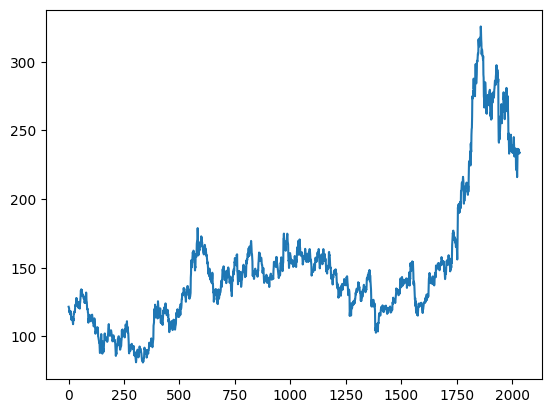

In [34]:
plt.plot(df['Close'])

In [35]:
df1 = df['Close']

# **Feature Scaling**

In [36]:
scaler = MinMaxScaler(feature_range=(-1,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[-0.66830065],
       [-0.67361111],
       [-0.67565359],
       ...,
       [ 0.25245098],
       [ 0.24428105],
       [ 0.24836601]])

# **Splitting the data into training and test sets**

In [37]:
training_size = int(len(df1)*0.75)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

training_size, test_size

(1526, 509)

In [38]:
#converting an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [39]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [40]:
print(X_train.shape)
print(y_train.shape)

(1425, 100)
(1425,)


In [41]:
#Reshaping input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **Building the Model**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
21/21 [==============================] - 13s 269ms/step - loss: 0.0543 - val_loss: 0.0095
Epoch 2/60
21/21 [==============================] - 5s 264ms/step - loss: 0.0084 - val_loss: 0.0054
Epoch 3/60
21/21 [==============================] - 4s 199ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 4/60
21/21 [==============================] - 4s 204ms/step - loss: 0.0037 - val_loss: 0.0061
Epoch 5/60
21/21 [==============================] - 6s 267ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 6/60
21/21 [==============================] - 4s 202ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 7/60
21/21 [==============================] - 6s 279ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 8/60
21/21 [==============================] - 6s 285ms/step - loss: 0.0031 - val_loss: 0.0020
Epoch 9/60
21/21 [==============================] - 6s 268ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 10/60
21/21 [==============================] - 6s 265ms/step - loss: 0.0029 - val_loss: 0.001

In [45]:
#Prediction of scaled test set
test_predict = model.predict(X_test)

13/13 [==============================] - 2s 45ms/step


In [46]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [47]:
test_predict1

array([[135.34956],
       [139.15398],
       [141.34239],
       [143.15436],
       [143.79277],
       [143.58636],
       [142.50961],
       [141.07072],
       [139.26994],
       [138.13646],
       [137.82706],
       [138.48375],
       [139.54169],
       [140.1155 ],
       [140.04695],
       [139.57819],
       [138.83751],
       [139.58315],
       [140.41019],
       [141.47667],
       [142.34729],
       [142.69951],
       [142.2996 ],
       [141.41777],
       [139.59338],
       [138.30522],
       [138.15074],
       [139.6691 ],
       [141.72443],
       [143.81674],
       [145.19394],
       [145.08492],
       [146.2028 ],
       [147.79913],
       [148.54765],
       [148.96951],
       [149.16978],
       [149.11348],
       [149.0289 ],
       [149.29584],
       [149.91432],
       [150.67967],
       [150.78789],
       [150.52563],
       [150.72423],
       [150.8655 ],
       [150.61882],
       [149.9558 ],
       [148.93768],
       [148.45636],


# **Performance Metrics**


  Mean Square error

In [48]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low

0.2590359082909754

# **Conclusion**
This proves that using this Keras model with Stacked LSTM Layers Combined with Dropouts can provide us with 98% training accuracy and 89% test set accuracy which is pretty good for a Stock Prediction model.